In [1]:
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity= 'all'
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import matplotlib.font_manager as fm
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from statsmodels.iolib.summary2 import summary_col
import statsmodels.stats.stattools as tools
import statsmodels.stats.diagnostic as sm_diagnostic
import statsmodels.stats as sm_stats
import statsmodels.stats.outliers_influence as oi
from patsy import dmatrices
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import statsmodels.stats as sm_stats

In [4]:
data=pd.read_excel('범죄율 데이터셋_2.xlsx')
data

,region,year,region_code,crime,people,EQ5D,drink,smoke,culture,social,...,grand,police,divorce,살인,강도,강간,절도,폭력,사기,hospital
0,서울특별시,2012,1,3.8500,10195318.0,0.954,NaN,NaN,299.0,709.0,...,10.8,433.0,2.0,0.018146,0.058458,0.587721,6.220502,6.076907,5.632978,8.1
1,서울특별시종로구,2012,2,8.1200,165207.0,0.954,NaN,NaN,57.0,17.0,...,14.4,23.0,2.2,0.000490,0.001569,0.023540,0.226378,0.227359,0.183908,20.6
2,서울특별시중구,2012,3,11.2970,133360.0,0.961,NaN,NaN,20.0,5.0,...,14.0,17.0,2.5,0.000490,0.001373,0.029818,0.235206,0.225986,0.202838,12.6
3,서울특별시용산구,2012,4,4.3240,243232.0,0.953,NaN,NaN,14.0,13.0,...,13.5,12.0,2.1,0.000687,0.003139,0.018538,0.152619,0.184889,0.135847,4.5
4,서울특별시성동구,2012,5,3.3640,299604.0,0.957,NaN,NaN,10.0,6.0,...,11.4,15.0,2.0,0.000294,0.000981,0.011476,0.170470,0.144478,0.122017,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,이천시,2021,123,3.2266,223177.0,NaN,11.3,16.4,12.0,NaN,...,14.8,13.0,2.1,0.000098,0.000000,0.012359,0.058949,0.121526,0.155169,10.7
1266,구리시,2021,124,2.6330,191948.0,NaN,14.3,18.4,6.0,NaN,...,14.5,5.0,1.8,0.000196,0.000098,0.010103,0.047277,0.071896,0.085726,13.5
1267,서산시,2021,125,2.7796,176645.0,NaN,14.0,19.1,10.0,NaN,...,19.2,NaN,2.3,0.000098,0.000392,0.011280,0.053064,0.080919,0.081900,5.6
1268,제천시,2021,126,2.5138,131591.0,NaN,16.4,19.8,15.0,NaN,...,23.3,NaN,2.2,0.000294,0.000196,0.006375,0.038057,0.058458,0.051592,16.8


In [5]:
data.describe()

,year,region_code,crime,people,EQ5D,drink,smoke,culture,social,GRDP,...,grand,police,divorce,살인,강도,강간,절도,폭력,사기,hospital
count,1270.000000,1270.000000,1261.000000,1.261000e+03,992.000000,1125.000000,1125.000000,1254.000000,1128.000000,919.000000,...,1254.000000,1118.000000,1246.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1261.000000,1260.000000
mean,2016.500000,64.000000,3.861316,5.213352e+05,0.955688,17.467289,21.207556,20.060606,56.789007,38.375450,...,14.201356,20.092129,2.106180,0.000817,0.001375,0.032582,0.231189,0.286447,0.280473,14.946905
std,2.873413,36.675047,1.630604,9.643851e+05,0.009282,3.394356,3.059857,36.302153,88.491097,44.500044,...,4.407947,42.448932,0.355318,0.001525,0.003112,0.077601,0.471901,0.550561,0.549855,8.704680
min,2012.000000,1.000000,0.617000,2.003900e+04,0.914000,7.500000,12.100000,1.000000,1.000000,6.796766,...,5.600000,3.000000,1.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005493,1.600000
25%,2014.000000,32.000000,2.981000,2.163690e+05,0.950000,15.300000,19.200000,8.000000,20.000000,18.970516,...,11.100000,9.000000,1.800000,0.000294,0.000392,0.010520,0.087001,0.118510,0.108579,9.100000
50%,2016.500000,64.000000,3.464500,3.351420e+05,0.956000,17.600000,21.200000,12.000000,36.000000,27.037719,...,13.550000,13.000000,2.100000,0.000490,0.000687,0.017851,0.135994,0.174835,0.167136,13.000000
75%,2019.000000,96.000000,4.177000,4.961320e+05,0.962000,19.600000,23.300000,19.000000,57.000000,38.352315,...,16.475000,19.000000,2.300000,0.000883,0.001373,0.032270,0.222210,0.275592,0.256392,18.000000
max,2021.000000,127.000000,14.511000,1.019532e+07,0.980000,35.100000,30.200000,435.000000,804.000000,431.692090,...,34.100000,433.000000,3.600000,0.018146,0.058458,0.982216,6.250124,6.370767,6.221876,64.000000


In [8]:
variable = ['crime','year','region_code','EQ5D','drink','smoke','culture','social','GRDP','suicide','foreign','grand','police','divorce']

In [7]:
corr = data[variable].corr(method='spearman').round(2)
corr

,crime,year,region_code,EQ5D,drink,smoke,culture,social,GRDP,suicide,foreign,grand,police,divorce
crime,1.00,-0.32,-0.03,-0.03,0.23,0.35,-0.04,-0.23,0.39,0.21,0.18,0.01,0.04,0.31
year,-0.32,1.00,0.00,0.16,-0.31,-0.57,0.19,0.12,0.17,-0.09,0.09,0.45,0.04,-0.20
region_code,-0.03,0.00,1.00,0.06,0.17,0.19,0.21,0.29,0.15,0.23,0.03,-0.15,-0.22,0.38
EQ5D,-0.03,0.16,0.06,1.00,-0.07,-0.25,-0.02,-0.12,0.04,-0.09,-0.18,0.10,-0.04,-0.20
drink,0.23,-0.31,0.17,-0.07,1.00,0.53,-0.17,-0.03,-0.02,0.29,0.06,0.01,-0.17,0.43
smoke,0.35,-0.57,0.19,-0.25,0.53,1.00,-0.21,0.03,-0.01,0.37,0.07,-0.10,-0.15,0.57
culture,-0.04,0.19,0.21,-0.02,-0.17,-0.21,1.00,0.58,0.18,-0.13,0.17,-0.11,0.54,-0.14
social,-0.23,0.12,0.29,-0.12,-0.03,0.03,0.58,1.00,-0.18,0.01,0.02,-0.21,0.35,0.09
GRDP,0.39,0.17,0.15,0.04,-0.02,-0.01,0.18,-0.18,1.00,-0.00,0.51,-0.04,0.04,0.15
suicide,0.21,-0.09,0.23,-0.09,0.29,0.37,-0.13,0.01,-0.00,1.00,0.00,0.31,-0.16,0.48


In [9]:
corr = data[variable].corr(method='pearson').round(2)
corr

,crime,year,region_code,EQ5D,drink,smoke,culture,social,GRDP,suicide,foreign,grand,police,divorce
crime,1.00,-0.20,-0.17,-0.04,0.15,0.27,-0.02,-0.12,0.61,0.15,0.31,0.14,-0.02,0.24
year,-0.20,1.00,-0.00,0.16,-0.30,-0.56,0.07,0.06,0.03,-0.09,0.06,0.43,0.01,-0.21
region_code,-0.17,-0.00,1.00,0.04,0.18,0.19,-0.10,-0.02,-0.11,0.23,-0.10,-0.10,-0.20,0.37
EQ5D,-0.04,0.16,0.04,1.00,-0.08,-0.24,-0.01,-0.06,-0.01,-0.08,-0.13,0.08,-0.01,-0.22
drink,0.15,-0.30,0.18,-0.08,1.00,0.55,-0.09,-0.05,-0.03,0.29,0.02,0.08,-0.07,0.46
smoke,0.27,-0.56,0.19,-0.24,0.55,1.00,-0.10,-0.02,0.00,0.38,0.04,-0.04,-0.07,0.58
culture,-0.02,0.07,-0.10,-0.01,-0.09,-0.10,1.00,0.89,0.04,-0.09,0.04,-0.05,0.94,-0.09
social,-0.12,0.06,-0.02,-0.06,-0.05,-0.02,0.89,1.00,-0.10,-0.06,-0.01,-0.11,0.86,-0.00
GRDP,0.61,0.03,-0.11,-0.01,-0.03,0.00,0.04,-0.10,1.00,-0.02,0.44,0.02,-0.00,0.07
suicide,0.15,-0.09,0.23,-0.08,0.29,0.38,-0.09,-0.06,-0.02,1.00,-0.06,0.35,-0.07,0.42


<AxesSubplot:>

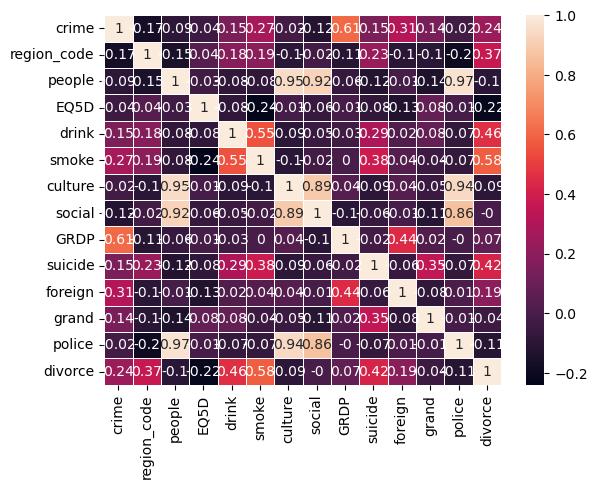

In [18]:
sn.heatmap(data = corr, annot=True, linewidths = 0.5)
plt.show()

In [21]:
print(variable)

['crime', 'region_code', 'people', 'EQ5D', 'drink', 'smoke', 'culture', 'social', 'GRDP', 'suicide', 'foreign', 'grand', 'police', 'divorce']


In [10]:
data=pd.read_excel('범죄율 데이터셋_2.xlsx')
reg =sm.OLS(data['crime'],sm.add_constant(data[['year','region_code', 'EQ5D', 'GRDP', 'foreign', 'grand', 'police', 'divorce']])
            ,missing='drop').fit(cov_type = 'HC0')
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  crime   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     86.53
Date:                Mon, 08 Jan 2024   Prob (F-statistic):          8.18e-103
Time:                        14:15:16   Log-Likelihood:                -1221.8
No. Observations:                 804   AIC:                             2462.
Df Residuals:                     795   BIC:                             2504.
Df Model:                           8                                         
Covariance Type:                  HC0                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         328.6109     36.873      8.912      

In [11]:
data=pd.read_excel('범죄율 데이터셋_2.xlsx')
reg =sm.OLS(data['GRDP'],sm.add_constant(data[['EQ5D']])
            ,missing='drop').fit(cov_type = 'HC0')
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   GRDP   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1329
Date:                Mon, 08 Jan 2024   Prob (F-statistic):              0.716
Time:                        14:15:23   Log-Likelihood:                -4285.4
No. Observations:                 815   AIC:                             8575.
Df Residuals:                     813   BIC:                             8584.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.0920    165.544      0.599      0.5

data=pd.read_excel('범죄율 데이터셋_2.xlsx')
reg =sm.OLS(data['crime'],sm.add_constant(data[['year','region_code','smoke','GRDP','suicide','foreign','grand','police']])
            ,missing='drop').fit(cov_type = 'HC0')
print(reg.summary())

In [107]:
predictions = reg.predict(sm.add_constant(data[['year','region_code','smoke','GRDP','suicide','foreign','grand','police']].dropna()))

In [110]:
mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)
print("MSE : ", mse)
print("RMSE : ", rmse)

MSE :  1.3313951363356997
RMSE :  1.1538609692400985


In [ ]:
'EQ5D', 'GRDP', 'foreign', 'grand', 'police', 'divorce'

# 다중공선성  VIF test

In [46]:
features = 'EQ5D + GRDP +foreign + grand + police + divorce'
y, X = dmatrices( 'crime~'+ features, data, return_type='dataframe')

C:\Users\LG\anaconda3\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\LG\anaconda3\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\LG\anaconda3\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\LG\anaconda3\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\LG\anaconda3\lib\site-packages\

In [47]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif
vif['features'] = X.columns
vif

,VIF Factor
0,12382.159223
1,1.086373
2,1.257100
3,1.341717
4,1.021080
5,1.014671
6,1.136659


,VIF Factor,features
0,12382.159223,Intercept
1,1.086373,EQ5D
2,1.257100,GRDP
3,1.341717,foreign
4,1.021080,grand
5,1.014671,police
6,1.136659,divorce


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Random Forest

In [50]:
print(variable)

['crime', 'region_code', 'people', 'EQ5D', 'drink', 'smoke', 'culture', 'social', 'GRDP', 'suicide', 'foreign', 'grand', 'police', 'divorce']


In [58]:
data=pd.read_excel('범죄율 데이터셋_2.xlsx')
data = data[['crime', 'region_code', 'EQ5D', 'drink', 'smoke', 'culture', 'social', 'GRDP', 'suicide', 'foreign', 'grand', 'police', 'divorce']].dropna()
X = data[['crime', 'region_code', 'EQ5D', 'drink', 'smoke', 'culture', 'social', 'GRDP', 'suicide', 'foreign', 'grand', 'police', 'divorce']]
X = X.drop('crime', axis=1).dropna()
y = data['crime'].dropna()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=1000, random_state=42,oob_score=True,n_jobs=-1,criterion='squared_error')

rf_model.fit(X_train, y_train)

predictions_test = rf_model.predict(X_test)

predictions_train = rf_model.predict(X_train)

mse_train = mean_squared_error(y_train, predictions_train)
rmse_train = mean_squared_error(y_train, predictions_train, squared=False)

mse_test = mean_squared_error(y_test, predictions_test)
rmse_test = mean_squared_error(y_test, predictions_test, squared=False)


print("test score:", r2_score(y_test, predictions_test))
print("Train MSE:", mse_train)
print("Train RMSE:", rmse_train)
print("Test MSE:", mse_test)
print("Test RMSE:", rmse_test)
importances = rf_model.feature_importances_

RandomForestRegressor(n_estimators=1000, n_jobs=-1, oob_score=True,
                      random_state=42)

test score: 0.867078957358529
Train MSE: 0.06255171126395097
Train RMSE: 0.2501034011443086
Test MSE: 0.29998385505846625
Test RMSE: 0.5477078190590913


In [61]:
feature_importances = pd.DataFrame(rf_model.feature_importances_,index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
pd.DataFrame(feature_importances)

,importance
GRDP,0.363536
social,0.229254
region_code,0.128053
grand,0.093481
foreign,0.036574
smoke,0.032560
police,0.026469
culture,0.022584
suicide,0.021984
divorce,0.018172


<Figure size 600x300 with 0 Axes>

Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 12 artists>

([<matplotlib.axis.XTick at 0x1edff3d2c10>,
 [Text(0, 0, 'GRDP'),
  Text(1, 0, 'social'),
  Text(2, 0, 'region_code'),
  Text(3, 0, 'grand'),
  Text(4, 0, 'foreign'),
  Text(5, 0, 'smoke'),
  Text(6, 0, 'police'),
  Text(7, 0, 'culture'),
  Text(8, 0, 'suicide'),
  Text(9, 0, 'divorce'),
  Text(10, 0, 'drink'),
  Text(11, 0, 'EQ5D')])

(-1.0, 12.0)

Text(0, 0.5, 'Importance')

Text(0.5, 0, 'Features')

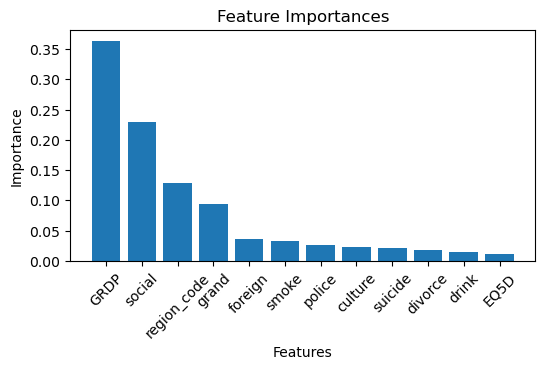

In [62]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1] 

plt.figure(figsize=(6,3))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

In [67]:
data=pd.read_excel('범죄율 데이터셋_2.xlsx')
data = data[['year','region_code','crime', 'EQ5D', 'GRDP', 'foreign', 'grand', 'police', 'divorce']].dropna()
X = data[['year','region_code','crime', 'EQ5D', 'GRDP', 'foreign', 'grand', 'police', 'divorce']]
X = X.drop('crime', axis=1).dropna()
y = data['crime'].dropna()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=1000, random_state=42,oob_score=True,n_jobs=-1,criterion='squared_error')

rf_model.fit(X_train, y_train)

predictions_test = rf_model.predict(X_test)

predictions_train = rf_model.predict(X_train)

mse_train = mean_squared_error(y_train, predictions_train)
rmse_train = mean_squared_error(y_train, predictions_train, squared=False)

mse_test = mean_squared_error(y_test, predictions_test)
rmse_test = mean_squared_error(y_test, predictions_test, squared=False)


print("test score:", r2_score(y_test, predictions_test))

print("Train MSE:", mse_train)
print("Train RMSE:", rmse_train)
print("Test MSE:", mse_test)
print("Test RMSE:", rmse_test)
importances = rf_model.feature_importances_

RandomForestRegressor(n_estimators=1000, n_jobs=-1, oob_score=True,
                      random_state=42)

test score: 0.9071193644814042
Train MSE: 0.04809648277885785
Train RMSE: 0.21930910327402703
Test MSE: 0.27798231751419517
Test RMSE: 0.5272402844189689


In [68]:
feature_importances = pd.DataFrame(rf_model.feature_importances_,index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

             importance
GRDP           0.406594
grand          0.220618
region_code    0.181578
foreign        0.049723
police         0.045069
divorce        0.039858
year           0.037881
EQ5D           0.018680


<Figure size 600x300 with 0 Axes>

Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 8 artists>

([<matplotlib.axis.XTick at 0x1edff0b7ac0>,
 [Text(0, 0, 'GRDP'),
  Text(1, 0, 'grand'),
  Text(2, 0, 'region_code'),
  Text(3, 0, 'foreign'),
  Text(4, 0, 'police'),
  Text(5, 0, 'divorce'),
  Text(6, 0, 'year'),
  Text(7, 0, 'EQ5D')])

(-1.0, 8.0)

Text(0, 0.5, 'Importance')

Text(0.5, 0, 'Features')

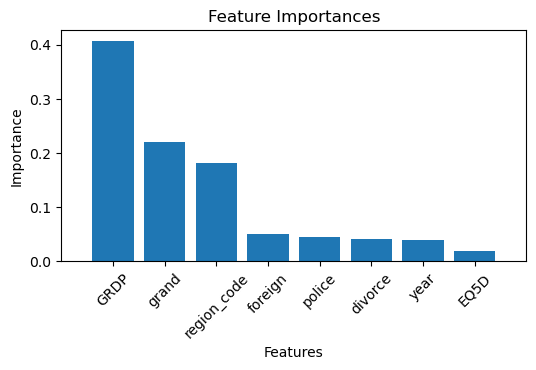

In [69]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1] 

plt.figure(figsize=(6,3))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

In [56]:
data = data[['crime','smoke','GRDP','suicide','foreign','grand','police']].dropna()
X = data[['crime','smoke','GRDP','suicide','foreign','grand','police']]
X = X.drop('crime', axis=1).dropna()
y = data['crime'].dropna()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=1000, random_state=42,oob_score=True,n_jobs=-1,criterion='squared_error')

rf_model.fit(X_train, y_train)

predictions_test = rf_model.predict(X_test)

predictions_train = rf_model.predict(X_train)

mse_train = mean_squared_error(y_train, predictions_train)
rmse_train = mean_squared_error(y_train, predictions_train, squared=False)

mse_test = mean_squared_error(y_test, predictions_test)
rmse_test = mean_squared_error(y_test, predictions_test, squared=False)


print("test R²:", r2_score(y_test, predictions_test))

print("Train MSE:", mse_train)
print("Train RMSE:", rmse_train)
print("Test MSE:", mse_test)
print("Test RMSE:", rmse_test)
importances = rf_model.feature_importances_

RandomForestRegressor(n_estimators=1000, n_jobs=-1, oob_score=True,
                      random_state=42)

R²: 0.7874097037089116
Train MSE: 0.11857760339822378
Train RMSE: 0.34435098867031555
Test MSE: 0.6769144562780051
Test RMSE: 0.8227481122907576


<Figure size 600x300 with 0 Axes>

Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 8 artists>

([<matplotlib.axis.XTick at 0x2d55944d340>,
 [Text(0, 0, 'GRDP'),
  Text(1, 0, 'grand'),
  Text(2, 0, 'region_code'),
  Text(3, 0, 'smoke'),
  Text(4, 0, 'foreign'),
  Text(5, 0, 'suicide'),
  Text(6, 0, 'police'),
  Text(7, 0, 'year')])

(-1.0, 8.0)

Text(0, 0.5, 'Importance')

Text(0.5, 0, 'Features')

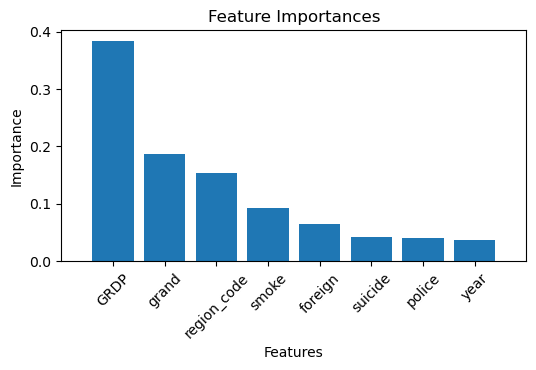

In [74]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1] 

plt.figure(figsize=(6,3))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

In [62]:
from sklearn.metrics import accuracy_score

In [75]:
feature_importances = pd.DataFrame(rf_model.feature_importances_,index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

             importance
GRDP           0.383692
grand          0.185933
region_code    0.153306
smoke          0.093034
foreign        0.064856
suicide        0.042160
police         0.039826
year           0.037193


In [76]:
print("OOB Score:", rf_model.oob_score_)

OOB Score: 0.7184212315549907


In [70]:
data=pd.read_excel('범죄율 데이터셋_2.xlsx')
data = data[['crime', 'region_code', 'EQ5D', 'drink', 'smoke', 'culture', 'social', 'GRDP', 'suicide', 'foreign', 'grand', 'police', 'divorce']].dropna()
X = data[['crime', 'region_code', 'EQ5D', 'drink', 'smoke', 'culture', 'social', 'GRDP', 'suicide', 'foreign', 'grand', 'police', 'divorce']]
X = X.drop('crime', axis=1).dropna()
y = data['crime'].dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 생성 및 훈련
xgb_model = xgb.XGBRegressor(gamma=0,learning_rate=0.1, n_estimators=42)
xgb_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
predictions_test = xgb_model.predict(X_test)

# 학습 데이터에 대한 예측
predictions_train = xgb_model.predict(X_train)

# 학습 데이터에 대한 MSE와 RMSE
mse_train = mean_squared_error(y_train, predictions_train)
rmse_train = mean_squared_error(y_train, predictions_train, squared=False)

# 테스트 데이터에 대한 MSE와 RMSE
mse_test = mean_squared_error(y_test, predictions_test)
rmse_test = mean_squared_error(y_test, predictions_test, squared=False)

# 성능 지표 출력
print("test score:", r2_score(y_test, predictions_test))
print("Train MSE:", mse_train)
print("Train RMSE:", rmse_train)
print("Test MSE:", mse_test)
print("Test RMSE:", rmse_test)

# 특성 중요도
importances = xgb_model.feature_importances_
feature_importances = pd.DataFrame(importances, index=X_train.columns, columns=["importance"]).sort_values("importance", ascending=False)
print(feature_importances)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=42, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

test score: 0.7791560927373778
Train MSE: 0.07516382352964812
Train RMSE: 0.2741602150744125
Test MSE: 0.4984132335277525
Test RMSE: 0.7059838762519669
             importance
GRDP           0.350860
social         0.184759
region_code    0.128479
grand          0.115326
police         0.054887
smoke          0.041208
culture        0.032626
foreign        0.027770
divorce        0.022872
suicide        0.017565
EQ5D           0.012990
drink          0.010657


Number of features in X_train: 12
Length of importances array: 12


<Figure size 600x300 with 0 Axes>

<BarContainer object of 12 artists>

Text(0.5, 1.0, 'Feature Importances')

Text(0, 0.5, 'Importance')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

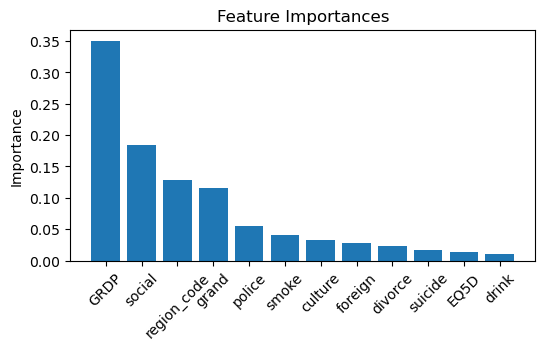

In [71]:
print("Number of features in X_train:", X_train.shape[1])
print("Length of importances array:", len(importances))

# 특성 중요도 데이터프레임 생성
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# 중요도에 따라 정렬 및 시각화
feature_importances = feature_importances.sort_values("Importance", ascending=False)
plt.figure(figsize=(6,3))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

In [72]:
data=pd.read_excel('범죄율 데이터셋_2.xlsx')
data = data[['year','region_code','crime', 'EQ5D', 'GRDP', 'foreign', 'grand', 'police', 'divorce']].dropna()
X = data[['year','region_code','crime', 'EQ5D', 'GRDP', 'foreign', 'grand', 'police', 'divorce']]
X = X.drop('crime', axis=1).dropna()
y = data['crime'].dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 생성 및 훈련
xgb_model = xgb.XGBRegressor(gamma=0,learning_rate=0.1, n_estimators=42)
xgb_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
predictions_test = xgb_model.predict(X_test)

# 학습 데이터에 대한 예측
predictions_train = xgb_model.predict(X_train)

# 학습 데이터에 대한 MSE와 RMSE
mse_train = mean_squared_error(y_train, predictions_train)
rmse_train = mean_squared_error(y_train, predictions_train, squared=False)

# 테스트 데이터에 대한 MSE와 RMSE
mse_test = mean_squared_error(y_test, predictions_test)
rmse_test = mean_squared_error(y_test, predictions_test, squared=False)

# 성능 지표 출력
print("test score:", r2_score(y_test, predictions_test))
print("Train MSE:", mse_train)
print("Train RMSE:", rmse_train)
print("Test MSE:", mse_test)
print("Test RMSE:", rmse_test)

# 특성 중요도
importances = xgb_model.feature_importances_
feature_importances = pd.DataFrame(importances, index=X_train.columns, columns=["importance"]).sort_values("importance", ascending=False)
print(feature_importances)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=42, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

test score: 0.8470531839159039
Train MSE: 0.05792963019371616
Train RMSE: 0.24068574987671404
Test MSE: 0.4577543010347093
Test RMSE: 0.676575421541981
             importance
GRDP           0.360437
grand          0.206459
region_code    0.197359
divorce        0.073095
police         0.058714
foreign        0.050626
year           0.040075
EQ5D           0.013235


Number of features in X_train: 8
Length of importances array: 8


<Figure size 600x300 with 0 Axes>

<BarContainer object of 8 artists>

Text(0.5, 1.0, 'Feature Importances')

Text(0, 0.5, 'Importance')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

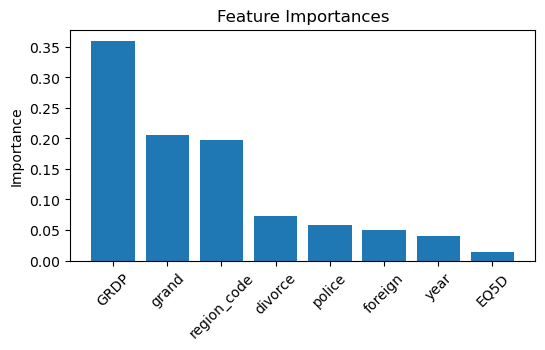

In [73]:
print("Number of features in X_train:", X_train.shape[1])
print("Length of importances array:", len(importances))

# 특성 중요도 데이터프레임 생성
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# 중요도에 따라 정렬 및 시각화
feature_importances = feature_importances.sort_values("Importance", ascending=False)
plt.figure(figsize=(6,3))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

# 사기

In [239]:
variable = ['year','region_code','EQ5D','drink','smoke','culture','social','GRDP','suicide','foreign','grand','police','divorce']

In [240]:
data=pd.read_excel('범죄율 데이터셋_2.xlsx')
x_variable = ['year','region_code','drink','social','suicide','grand','police']
reg =sm.OLS(data['사기'],sm.add_constant(data[x_variable])
            ,missing='drop').fit(cov_type ='HC0')
print(reg.summary())
features = x_variable[2]
for i in range(3,len(x_variable)):
    features = features+"+"+x_variable[i]
y, X = dmatrices( '사기~'+ features, data, return_type='dataframe')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['features'] = X.columns
vif

                            OLS Regression Results                            
Dep. Variable:                     사기   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     349.8
Date:                Fri, 08 Dec 2023   Prob (F-statistic):          9.76e-254
Time:                        13:22:48   Log-Likelihood:                 715.60
No. Observations:                 924   AIC:                            -1415.
Df Residuals:                     916   BIC:                            -1377.
Df Model:                           7                                         
Covariance Type:                  HC0                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -28.1714      4.201     -6.706      

C:\Users\LG\anaconda3\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\LG\anaconda3\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\LG\anaconda3\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\LG\anaconda3\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\LG\anaconda3\lib\site-packages\

,VIF Factor,features
0,46.864103,Intercept
1,1.139867,drink
2,4.000636,social
3,1.284916,suicide
4,1.237587,grand
5,3.966048,police


# 살인

In [237]:
variable = ['year','region_code','EQ5D','drink','smoke','culture','social','GRDP','suicide','foreign','grand','police','divorce']

In [238]:
data=pd.read_excel('범죄율 데이터셋_2.xlsx')
x_variable = ['year','region_code','social','GRDP','suicide','foreign','grand','police','divorce']
reg =sm.OLS(data['살인'],sm.add_constant(data[x_variable])
            ,missing='drop').fit(cov_type ='HC0')
print(reg.summary())
features = x_variable[2]
for i in range(3,len(x_variable)):
    features = features+"+"+x_variable[i]
y, X = dmatrices( '살인~'+ features, data, return_type='dataframe')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['features'] = X.columns
vif

                            OLS Regression Results                            
Dep. Variable:                     살인   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     294.4
Date:                Fri, 08 Dec 2023   Prob (F-statistic):          2.37e-252
Time:                        13:22:04   Log-Likelihood:                 5505.2
No. Observations:                 847   AIC:                        -1.099e+04
Df Residuals:                     837   BIC:                        -1.094e+04
Df Model:                           9                                         
Covariance Type:                  HC0                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0338      0.013      2.696      

C:\Users\LG\anaconda3\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\LG\anaconda3\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\LG\anaconda3\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\LG\anaconda3\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\LG\anaconda3\lib\site-packages\

,VIF Factor,features
0,53.189171,Intercept
1,4.477141,social
2,1.291776,GRDP
3,1.580355,suicide
4,1.341188,foreign
5,1.287472,grand
6,4.417624,police
7,1.503271,divorce


# 강간

In [217]:
variable = ['year','region_code','EQ5D','drink','smoke','culture','social','GRDP','suicide','foreign','grand','police','divorce']

In [234]:
data=pd.read_excel('범죄율 데이터셋_2.xlsx')
x_variable = ['year','region_code','drink','smoke','social','GRDP','foreign','grand','divorce']
reg =sm.OLS(data['강간'],sm.add_constant(data[x_variable])
            ,missing='drop').fit(cov_type ='HC0')
print(reg.summary())
features = x_variable[2]
for i in range(3,len(x_variable)):
    features = features+"+"+x_variable[i]
y, X = dmatrices( '강간~'+ features, data, return_type='dataframe')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['features'] = X.columns
vif

                            OLS Regression Results                            
Dep. Variable:                     강간   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     34.56
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           6.79e-52
Time:                        13:20:26   Log-Likelihood:                 1561.2
No. Observations:                 835   AIC:                            -3102.
Df Residuals:                     825   BIC:                            -3055.
Df Model:                           9                                         
Covariance Type:                  HC0                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.8659      1.407      4.880      

C:\Users\LG\anaconda3\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\LG\anaconda3\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\LG\anaconda3\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\LG\anaconda3\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\LG\anaconda3\lib\site-packages\

,VIF Factor,features
0,78.750455,Intercept
1,1.399006,drink
2,1.634086,smoke
3,1.033519,social
4,1.268804,GRDP
5,1.333316,foreign
6,1.069740,grand
7,1.591635,divorce


# 폭력

In [ ]:
variable = ['year','region_code','EQ5D','drink','smoke','culture','social','GRDP','suicide','foreign','grand','police','divorce']
x_variable = ['year','region_code','EQ5D','drink','smoke','culture','social','GRDP','suicide','foreign','grand','police']

In [215]:
data=pd.read_excel('범죄율 데이터셋_2.xlsx')
x_variable = ['year','region_code','EQ5D','drink','smoke','culture','social','suicide','foreign','grand','police']
reg =sm.OLS(data['폭력'],sm.add_constant(data[x_variable])
            ,missing='drop').fit(cov_type ='HC0')
print(reg.summary())
features = x_variable[2]
for i in range(3,len(x_variable)):
    features = features+"+"+x_variable[i]
y, X = dmatrices( '폭력~'+ features, data, return_type='dataframe')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['features'] = X.columns
vif

                            OLS Regression Results                            
Dep. Variable:                     폭력   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     270.2
Date:                Fri, 08 Dec 2023   Prob (F-statistic):          1.92e-268
Time:                        12:22:47   Log-Likelihood:                 834.85
No. Observations:                 861   AIC:                            -1646.
Df Residuals:                     849   BIC:                            -1589.
Df Model:                          11                                         
Covariance Type:                  HC0                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -7.5863      3.666     -2.069      

C:\Users\LG\anaconda3\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\LG\anaconda3\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\LG\anaconda3\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\LG\anaconda3\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\LG\anaconda3\lib\site-packages\

,VIF Factor,features
0,12011.852964,Intercept
1,1.103886,EQ5D
2,1.259019,drink
3,1.436294,smoke
4,14.990915,culture
5,5.579938,social
6,1.494779,suicide
7,1.056996,foreign
8,1.331524,grand
9,10.668322,police


# u가 X와 관련이 없는 내재적 속성이면 임의 효과(Random Effect: RE) 모형
# u가 X와 관련이 있는 내재적 속성이면 고정 효과(Fixed Effect: FE) 모형
# Wu-Hausman